
# Major Project

  **1.  Project Name :**

    Prediction of Cardiac Arrhythmia using contemporary techniques.

  **2.  Introduction:**

Irregular pumping of heart can be detected via an ElectroCardioGraph (ECG) which can insinuate a type of medical condition known as Cardiac Arrhythmia (etymologically Cardiac – heart + A – negation + rhythmia – repeated pattern). This abnormal heartbeat can allude a malignant condition or may be benign.

The proﬁle data of the patient along with the ECG waveforms can indicate the type of Arrhythmia present. This project aims to use contemporary models and algorithms to tackle the problem of prediction and classifying them among various types of arrhythmias. Ensemble learning will help to gain better predictive information using amalgamation of multiple algorithms, instead of using them individually which will enhance the results.
    
   Below is a schematic sample of a normal ECG.
    
![](wave.png)

   **3. Data Set:**
          
The data set of project is from UC Irvine Machine Learning Repository. https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data

        Cardiac Arrythmia Database contains 279 attributes, 206 of which are linear valued and the rest are nominal.

        Number of Instances: 452 Number of Attributes: 279
        
The data set is labeled with 16 different classes. Classes 2 to 15 correspond to different types of arrhythmia. Class 1 corresponds to normal ECG with no arrhythmia and class 16 refers to unlabeled patient.
    
    
The data set is heavily biased towards the no arrhythmia case with 245 instances belonging to class 1 and 185  instances being split among the 14 arrhythmia classes and the rest 22 are unclassified. 
    
The main challenges in processing this data set are the limited number of training examples compared to the number of features, heavy bias towards the case of normal ECG.


**A. Dataset collection**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn import metrics

In [2]:
data = pd.read_csv('arrhythmia.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [3]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [4]:
data.shape

(452, 280)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.8+ KB


## Dataset spread (For 16 classes)

![](spread.jpg)

In [6]:
data.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
0,452.0,46.471239,16.466631,0.0,36.0,47.0,58.0,83.0
1,452.0,0.550885,0.497955,0.0,0.0,1.0,1.0,1.0
2,452.0,166.188053,37.170340,105.0,160.0,164.0,170.0,780.0
3,452.0,68.170354,16.590803,6.0,59.0,68.0,79.0,176.0
4,452.0,88.920354,15.364394,55.0,80.0,86.0,94.0,188.0



**B. Data Wrangling**

Dealing with missing data.

In [7]:
#Let's see how many missing data we have and replace them with NaN's:
count=0
for i in range(0,452):
    for j in range(0,280):
        if (data.iloc[i,j]=='?'):
            count =count+1
print(count)
data = data.replace('?', np.NaN)

408


Text(0, 0.5, 'Count of NaN')

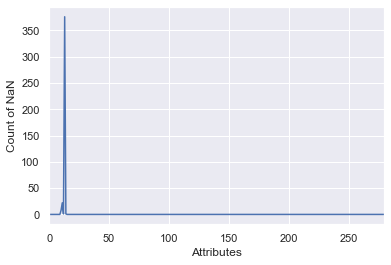

In [8]:
#Now let's see the distribution of our missing data: 
pd.isnull(data).sum().plot()
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

Text(0, 0.5, 'Count of NaN')

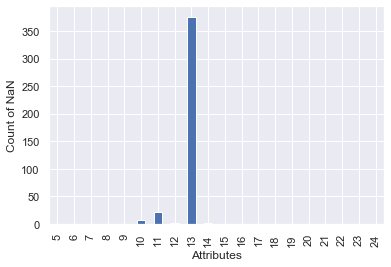

In [9]:
#zooming in :
pd.isnull(data).sum()[5:25].plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

Since the column number 13 contains the majority of missing data (roughly 370 with total 452 entries), it is better to drop the column.

In [10]:
#dropping column 13
data.drop(columns = 13, inplace=True)

In [12]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
data_no_missing = imputer.fit_transform(data)

data_no_missing=pd.DataFrame(data_no_missing)
data_no_missing.head()

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [13]:
#Adding column names
X_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279"]

In [14]:
X = data_no_missing.drop(columns = 278)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,274,275,276,277
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


In [15]:
X.columns = X_columns
X.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


In [16]:
y = data[279]
y.head()

0     8
1     6
2    10
3     1
4     7
Name: 279, dtype: int64

In [17]:
y.columns = ["Class"]
y.head()

0     8
1     6
2    10
3     1
4     7
Name: 279, dtype: int64

**C. EDA (Exploratory Data Analysis)**

Checking the data for any anomaly and outliers within the attributes to take care of before applying the algorithms for classification.

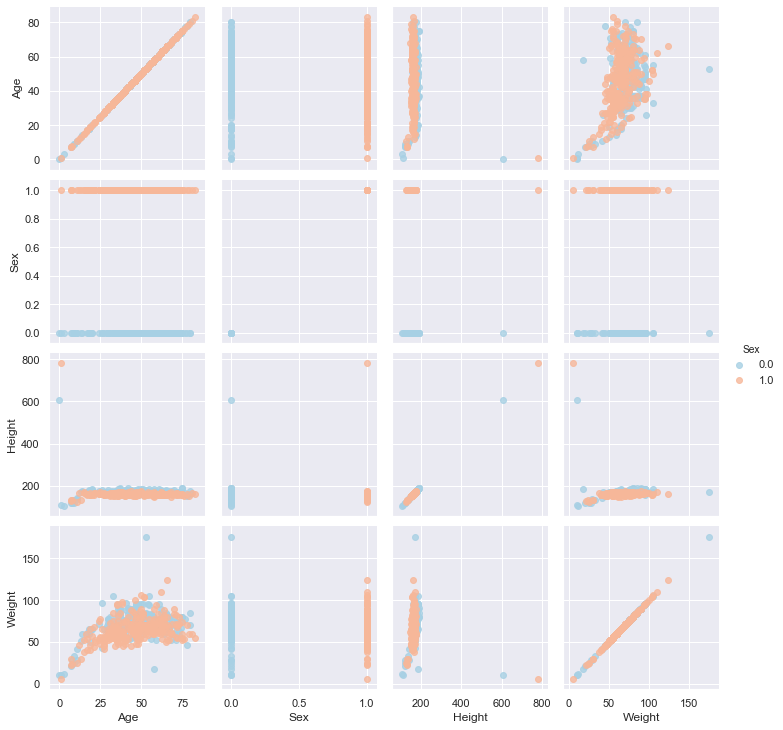

In [18]:
g = sns.PairGrid(X, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

According to scatter plots, there are few outliers in 'height' and 'weight' attributes.
I'll check the maximums of heights and weights

In [19]:
sorted(X['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

The height attribute contains 2 outliers as **780, 680 cm** which is **impossible**. Hence manually updating the values:

Replacing **780** and **608** with **180** and **108** cm respectively.

In [20]:
X['Height']=X['Height'].replace(608,108)
X['Height']=X['Height'].replace(780,180)

In [21]:
sorted(X['Weight'], reverse=True)[:10]


[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

Looks like **176** kgs is a possible weight. Hence no need to update.

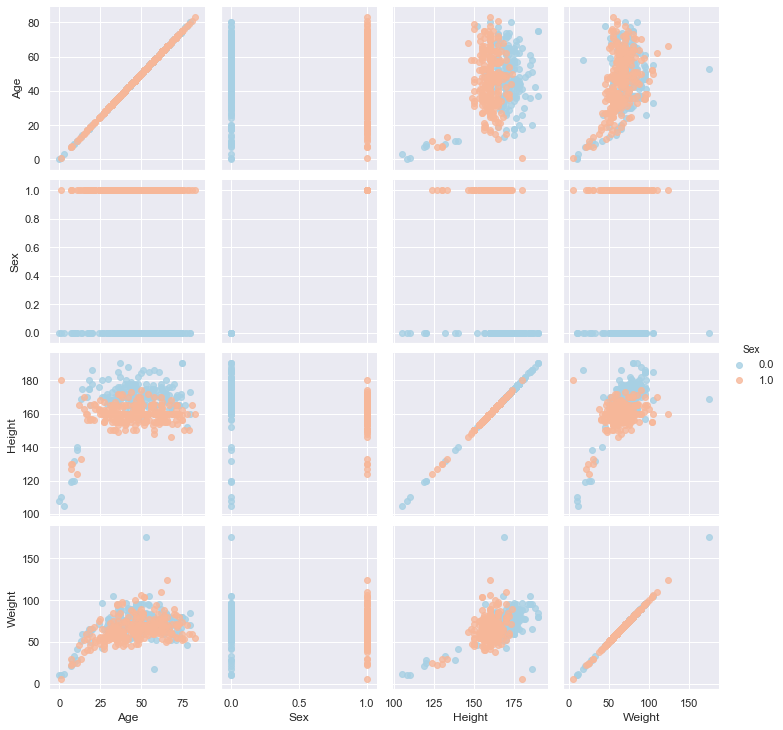

In [22]:
g = sns.PairGrid(X, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

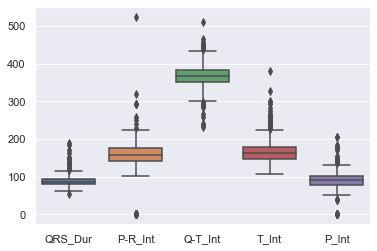

In [23]:
sns.boxplot(data=X[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);
#sns.swarmplot(data=X[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

**PR interval** is the period, measured in milliseconds, that extends from the beginning of the P wave  until the beginning of the QRS complex; it is normally between **120 and 200ms** in duration. 

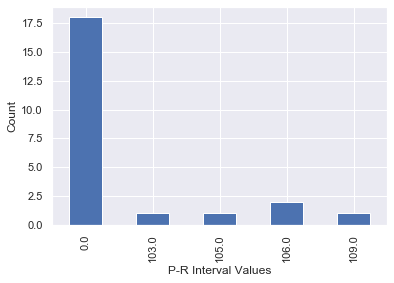

In [24]:
X['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

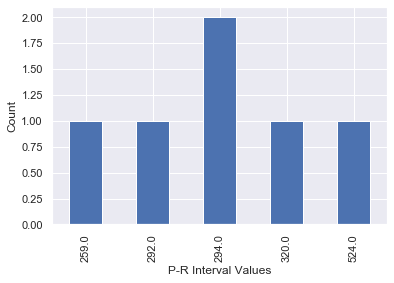

In [25]:
X['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

#### PR Interval data is including outliers 0(x18). I'll keep them

QT interval is a measure of the time between the start of the Q wave and the end of the T wave in the heart's electrical cycle. The outlier data appearing in Q-T Interval box might be related to the outlier of T-interval data.

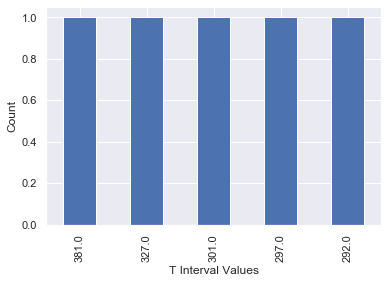

In [26]:
X['T_Int'].value_counts().sort_index(ascending=False).head().plot(kind='bar')
plt.xlabel('T Interval Values')
plt.ylabel('Count');

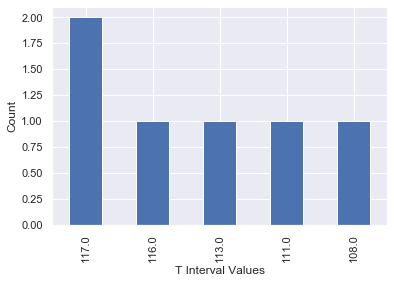

In [27]:
X['T_Int'].value_counts().sort_index(ascending=False).tail().plot(kind='bar')
plt.xlabel('T Interval Values')
plt.ylabel('Count');

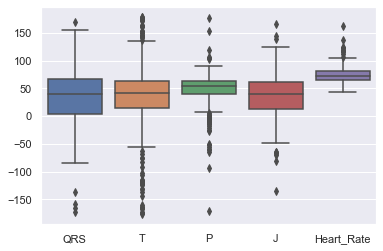

In [28]:
sns.boxplot(data=X[["QRS","T","P","J","Heart_Rate"]]);
#sns.swarmplot(data=X[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

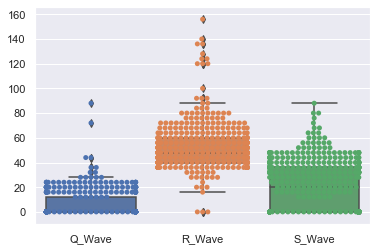

In [29]:
sns.boxplot(data=X[["Q_Wave","R_Wave","S_Wave"]])
sns.swarmplot(data=X[["Q_Wave","R_Wave","S_Wave"]]);

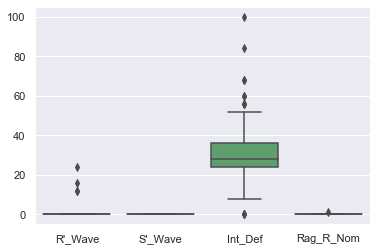

In [30]:
sns.boxplot(data=X[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]]);
#sns.swarmplot(data=X[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]])

#### S'Wave has 0's which is not a NaN. So, we can't assume it as including outliers.

In [31]:
X["R'_Wave"].value_counts().sort_index(ascending=False)

24.0      1
16.0      1
12.0      2
0.0     448
Name: R'_Wave, dtype: int64

In [32]:
X["S'_Wave"].value_counts().sort_index(ascending=False)

0.0    452
Name: S'_Wave, dtype: int64

In [33]:
X["Rag_R_Nom"].value_counts().sort_index(ascending=False)

1.0      1
0.0    451
Name: Rag_R_Nom, dtype: int64

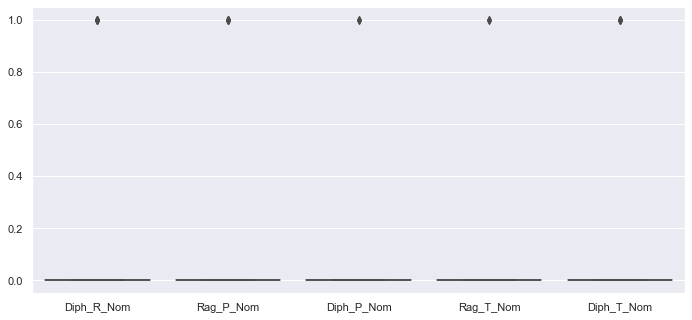

In [34]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom"]]);

In [35]:
X["Diph_R_Nom"].value_counts().sort_index(ascending=False)

1.0      5
0.0    447
Name: Diph_R_Nom, dtype: int64

In [36]:
X["Rag_P_Nom"].value_counts().sort_index(ascending=False)

1.0      5
0.0    447
Name: Rag_P_Nom, dtype: int64

In [37]:
X["Diph_P_Nom"].value_counts().sort_index(ascending=False)

1.0      2
0.0    450
Name: Diph_P_Nom, dtype: int64

In [38]:
X["Rag_T_Nom"].value_counts().sort_index(ascending=False)

1.0      2
0.0    450
Name: Rag_T_Nom, dtype: int64

In [39]:
X["Diph_T_Nom"].value_counts().sort_index(ascending=False)

1.0      4
0.0    448
Name: Diph_T_Nom, dtype: int64

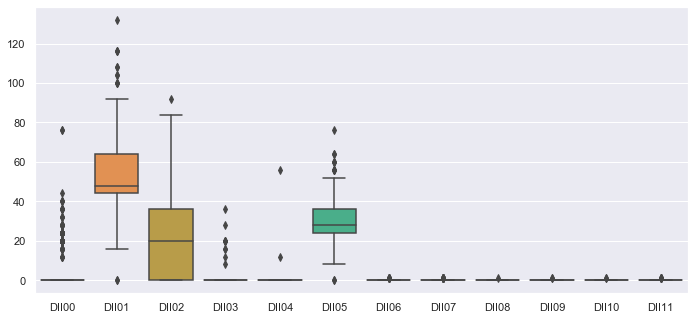

In [40]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11"]]);

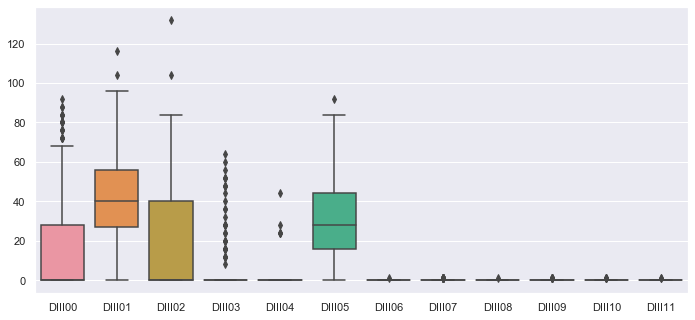

In [41]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06",
                       "DIII07","DIII08","DIII09","DIII10","DIII11"]]);

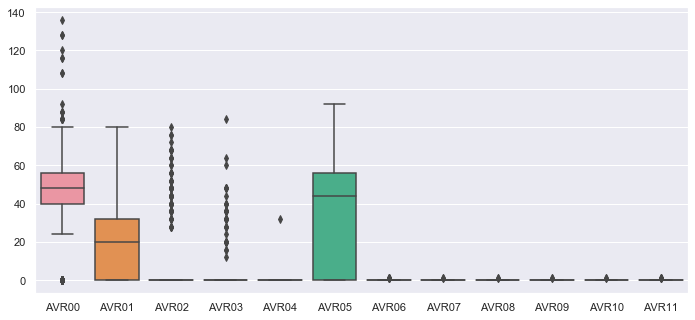

In [42]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVR00","AVR01","AVR02","AVR03","AVR04","AVR05",
                       "AVR06","AVR07","AVR08","AVR09","AVR10","AVR11"]]);

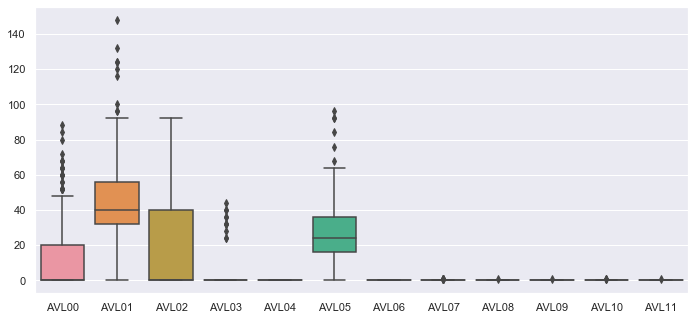

In [43]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11"]]);

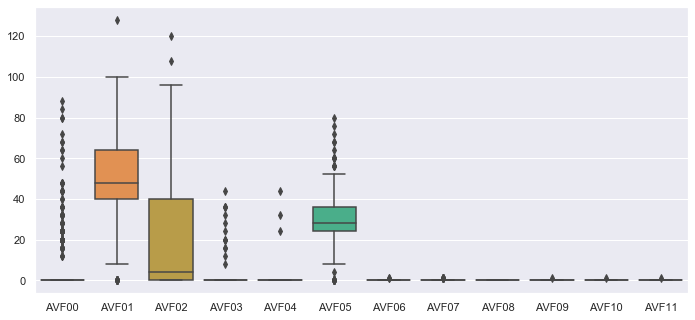

In [44]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11"]]);

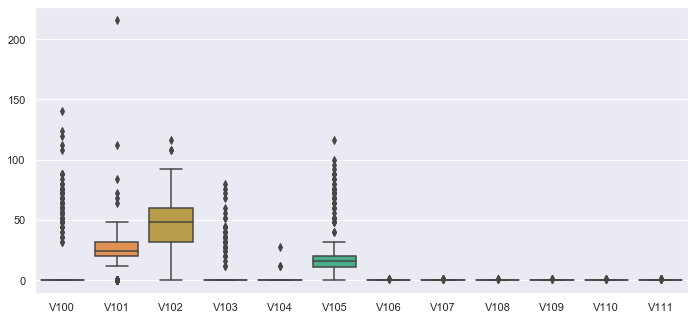

In [45]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111"]]);

In [46]:
X["V101"].value_counts().sort_index(ascending=False)

216.0     1
112.0     1
84.0      1
72.0      1
68.0      1
64.0      1
48.0      6
44.0      6
40.0     13
36.0     36
32.0     63
28.0     81
24.0     88
20.0     57
16.0     13
12.0      4
0.0      79
Name: V101, dtype: int64

**V101** has an outlier, but when we look at other sets (V201, V301, V501) we can see that there's an outlier similarly. Since our data is heavily biased, I can't say these outliers should be dropped. 

For example, when we look at our data, we can see that class # 8 (Supraventricular Premature Contraction) **has only 2 instances**. Or # 3 (Ventricular Premature Contraction (PVC)) has only 3. The outliers appearing with our plots might belong to these instances and needs to be kept.

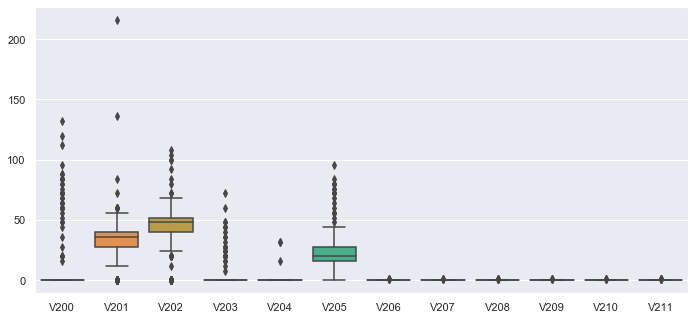

In [47]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211"]]);

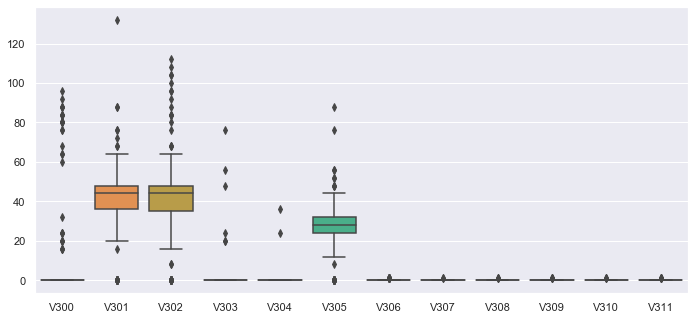

In [48]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311"]]);

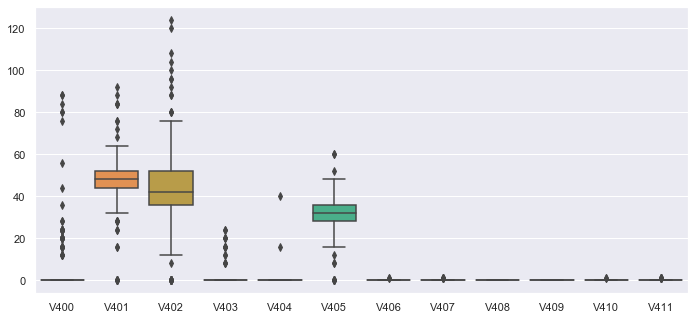

In [49]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411"]]);

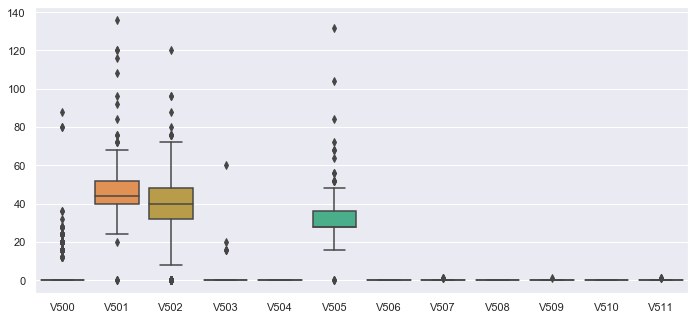

In [50]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511"]]);

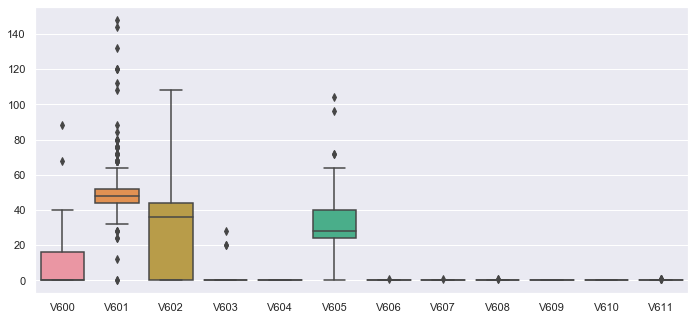

In [51]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611"]]);

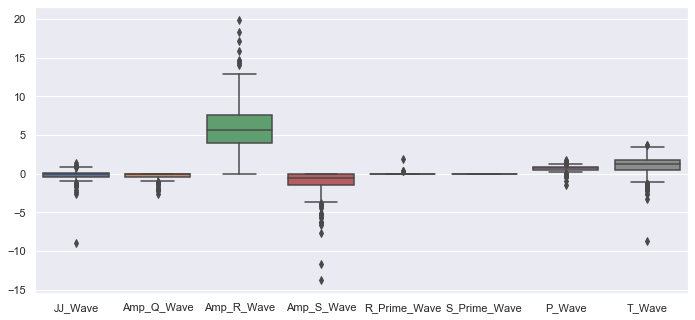

In [52]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave"]]);

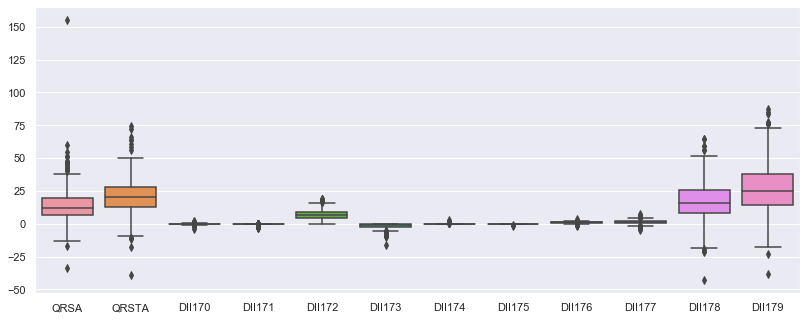

In [53]:
sns.set(rc={'figure.figsize':(13.7,5.27)})
sns.boxplot(data=X[["QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179"]]);

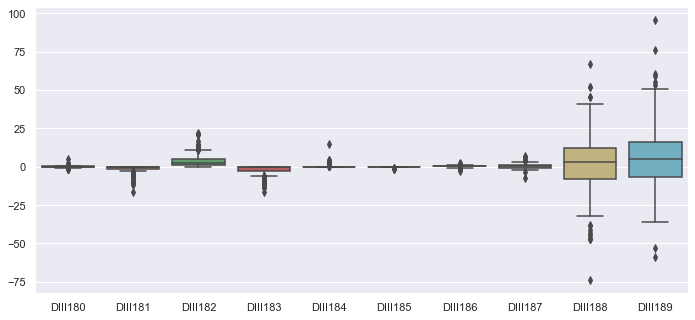

In [54]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189"]]);

Now we can see outlier within the last two attributes of each series(DIII188, DIII189, AVR198, AVR199, AVL208, AVL209, AVF218, AVF219, V2238, V2239, V3248, V3249,V4258, V4259,V5268, V5269, V6278, V6279). Similiarly assuming that these outliers might belong to the classes with few instances.

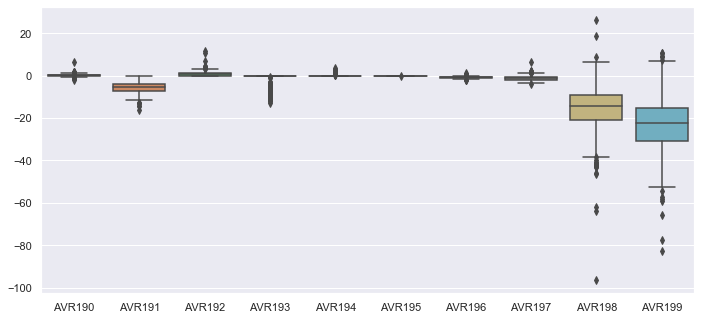

In [55]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199"]]);

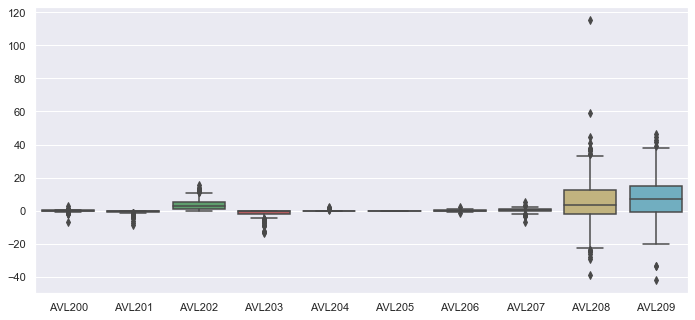

In [56]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209"]]);

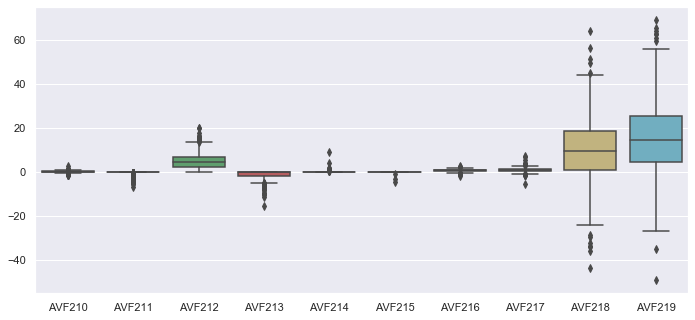

In [57]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219"]]);

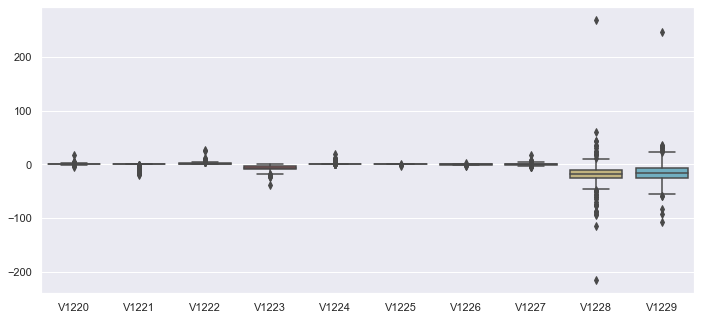

In [58]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229"]]);

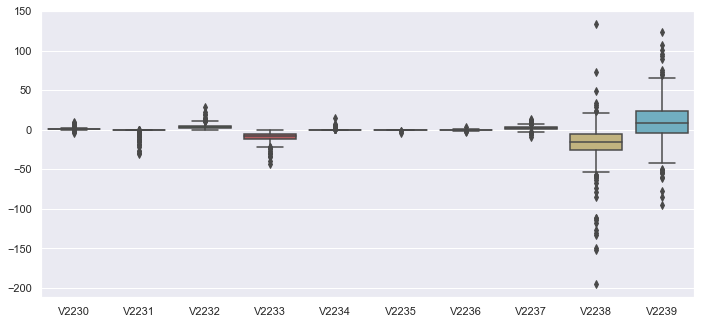

In [59]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239"]]);

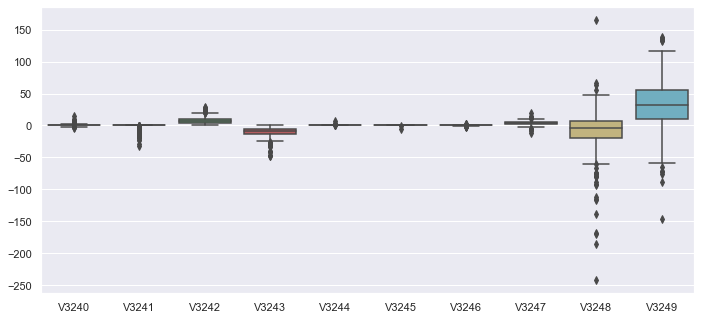

In [60]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249"]]);

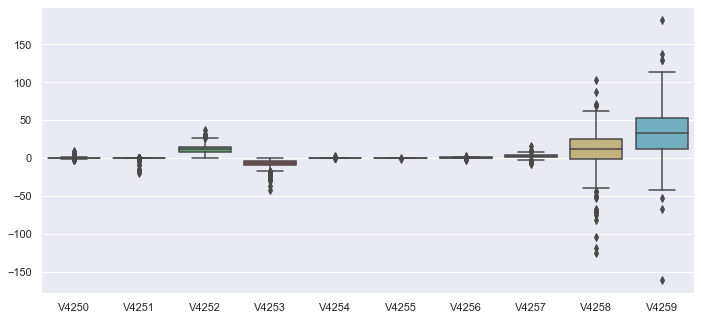

In [61]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259"]]);

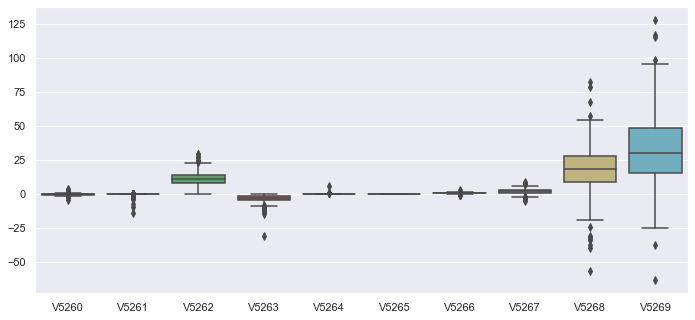

In [62]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269"]]);

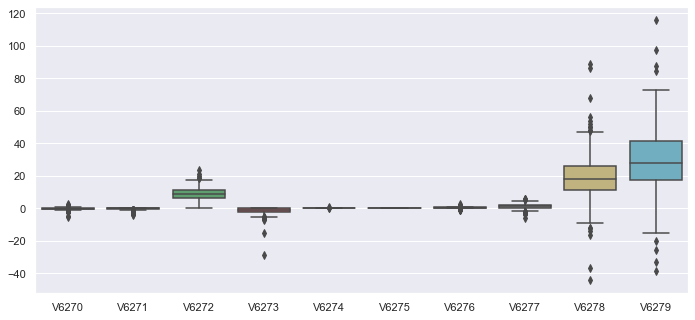

In [63]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279"]]);

**D. Modeling**

### Train Test Split

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 10)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Choosing ML Models and metrics

Trying all possible methods (including Gradient boosting, Adaboost, PCA applied to models)

Thinking about the classification evaluation metrics, the importance of my models' precitions (I can't accept a result having the probability of saying to a healty person that you have Cardiac Arrhythmia (FN)). It is important to find all the cases where a Cardiac arrhythmia is present. **(Maximizing the TP while keeping FN near to zero)**

I definitely will focus on **Sensitivity aka Recall** (the percentage of sick people who are correctly identified as having the condition) not Specificity (percentage of healthy people who are correctly identified as not having the condition). 

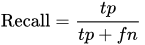

So, I'll use recall for my models and sklearn has a **"weighted"** metric which accounts for class imbalance by computing the average of metrics in which each class’s score is weighted by its presence in the true data sample.

I'll use GridSearchCV to obtain the best parameters for each model and get my results by applying those parameters.


### KNN Clasification

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()

param_grid = {'n_neighbors' : [1,2,3,4,5,7,10]}

grid_search = GridSearchCV (knn_clf, param_grid, cv=kFold,scoring = 'recall_weighted', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall_weighted', verbose=0)

In [67]:
grid_search.best_params_

{'n_neighbors': 2}

In [68]:
grid_search.best_score_

0.5937457279562542

In [170]:
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [171]:
y_pred_train = knn_clf.predict(X_train)
y_pred_test = knn_clf.predict(X_test)

knn_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
knn_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(knn_train_recall_score))
print('Test Recall score: {}'
      .format(knn_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.6875
Test Recall score: 0.6470588235294118


array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

Model fit well but KNN results are not good. 

### Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

lreg_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(lreg_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall_weighted', verbose=0)

In [72]:
grid_search.best_params_

{'C': 1}

In [73]:
grid_search.best_score_

0.7005468215994531

In [74]:
lreg_clf= LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1)
lreg_clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
y_pred_train = lreg_clf.predict(X_train)
y_pred_test = lreg_clf.predict(X_test)

lreg_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
lreg_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
print('Train Recall score: {}'
      .format(lreg_train_recall_score))
print('Test Recall score: {}'
      .format(lreg_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8411458333333334
Test Recall score: 0.6764705882352942


array([[37,  1,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

The large difference between train and test scores showing that the model is overfitting and low test score is also showing that Logistic Regression doesn't perform well.

### Linear SVM

In [76]:
from sklearn.svm import LinearSVC

LSVC_clf = LinearSVC(multi_class='crammer_singer')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(LSVC_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='crammer_singer', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall_weighted', verbose=0)

In [77]:
grid_search.best_params_

{'C': 1}

In [78]:
grid_search.best_score_

0.7032125768967875

In [172]:
LSVC_clf = LinearSVC(multi_class='crammer_singer', C=0.1)
LSVC_clf.fit(X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='crammer_singer', penalty='l2', random_state=None,
          tol=0.0001, verbose=0)

In [173]:
y_pred_train = LSVC_clf.predict(X_train)
y_pred_test = LSVC_clf.predict(X_test)

lsvc_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
lsvc_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(lsvc_train_recall_score))
print('Test Recall score: {}'
      .format(lsvc_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.9348958333333334
Test Recall score: 0.7058823529411765


array([[36,  1,  0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

Test score is better than KNN and Logistic Regression. Also model is good fit as there is not much difference between train and test score.

### Kernelized SVM

In [81]:
from sklearn import svm

KSVC_clf = svm.SVC(kernel='rbf')

param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10],
          'gamma': [0.0001,0.001,0.01,0.1,1,10]}

grid_search = GridSearchCV(KSVC_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall_weighted', verbose=0)

In [82]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [83]:
grid_search.best_score_

0.7109706083390295

In [84]:
KSVC_clf = svm.SVC(kernel='rbf',C=10,gamma=0.1)

KSVC_clf.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [85]:
y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

ksvc_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
ksvc_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(ksvc_train_recall_score))
print('Test Recall score: {}'
      .format(ksvc_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.9765625
Test Recall score: 0.6764705882352942


array([[35,  1,  0,  0,  0,  3,  0,  1,  0,  0,  0],
       [ 2,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

We can see that test score is poor and Kernalised SVM doesn't perform well. Also model is overfitting as there is large difference between train and test score.

### Naive Bayes

In [86]:
from sklearn.naive_bayes import MultinomialNB

mnb_clf = MultinomialNB()
param_grid = {'alpha':[0,1.0,10], 'fit_prior':(True, False)}

grid_search = GridSearchCV(mnb_clf, param_grid,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0, 1.0, 10], 'fit_prior': (True, False)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [87]:
grid_search.best_params_

{'alpha': 1.0, 'fit_prior': False}

In [88]:
grid_search.best_score_

0.6093984962406015

In [174]:
mnb_clf = MultinomialNB(alpha=1.0, fit_prior=False)

mnb_clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)

In [175]:
y_pred_train = mnb_clf.predict(X_train)
y_pred_test = mnb_clf.predict(X_test)

mnb_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
mnb_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(mnb_train_recall_score))
print('Test Recall score: {}'
      .format(mnb_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.6875
Test Recall score: 0.6323529411764706


array([[36,  0,  0,  0,  0,  1,  0,  2,  0,  0,  1],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

### Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2, 3, 4, 5,6, 10, 20]}

grid_search = GridSearchCV(dt_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
     

In [92]:
grid_search.best_params_

{'max_depth': 5}

In [93]:
grid_search.best_score_

0.692822966507177

In [176]:
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [177]:
y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

dt_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
dt_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(dt_train_recall_score))
print('Test Recall score: {}'
      .format(dt_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8046875
Test Recall score: 0.6617647058823529


array([[36,  0,  1,  0,  1,  1,  0,  1,  0,  0,  0],
       [ 2,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0]], dtype=int64)

Test score is poor and decision tree doesn't perform well. Also model is somewhat overfitting as there is difference between train and test score.

## Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',n_jobs= -1,random_state=10)

param_grid = {'max_features': [100,125,150,200],
          'max_depth': [6,8,10,12,14],
           'max_leaf_nodes':[20,22,30,50]}

grid_search = GridSearchCV(rf_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=-1,
                                           

In [99]:
grid_search.best_params_

{'max_depth': 14, 'max_features': 125, 'max_leaf_nodes': 50}

In [100]:
grid_search.best_score_

0.7656869446343132

In [101]:
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=125,max_depth=14,max_leaf_nodes=50)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features=125,
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

rf_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
rf_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(rf_train_recall_score))
print('Test Recall score: {}'
      .format(rf_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.9921875
Test Recall score: 0.7352941176470589


array([[36,  1,  0,  0,  2,  1,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

Test score is good and Random forest performs well as it is ensemble method. But model is overfitting as there is large difference between train and test score.

In [103]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

hard_voting_clf = VotingClassifier(estimators=[('knn', knn_clf),('lr',lreg_clf),('lsvc', LSVC_clf),
                                   ('ksvc', KSVC_clf),('dt', dt_clf), ('rt', rf_clf)],voting = 'hard')
hard_voting_clf.fit(X_train, y_train)

voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_)
acc = accuracy_score(y_val, preds)
l_loss = log_loss(y_val, preds)
f1 = f1_score(y_val, preds)

print("Accuracy is: " + str(acc))
print("Log Loss is: " + str(l_loss))
print("F1 Score is: " + str(f1))

print('Train score: {0:0.2f}'.format(hard_voting_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(hard_voting_clf.score(X_test, y_test)))

Train score: 0.86
Test score: 0.69


In [104]:
score = cross_val_score(estimator=hard_voting_clf,X=X_train,y=y_train, scoring='recall_weighted', cv=kFold)

In [105]:
print('Mean Score: {0:0.2f}'.format(score.mean()))
print('Mean Std: {0:0.2f}'.format(score.std()))

Mean Score: 0.70
Mean Std: 0.02


In [106]:
X_scaled = scaler.fit_transform(X)

### Bagging with KNN¶

In [107]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
bag_knn = BaggingClassifier(base_estimator=knn_clf, n_estimators=100,bootstrap_features=True, bootstrap=False,
                            max_samples=50, max_features=100)

score = cross_val_score(estimator=bag_knn, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)

In [108]:
print('Mean score:', score.mean())

Mean score: 0.5442735042735043


Bagging is giving us a very low score. It doesn't improve our model

### Pasting with KNN

In [109]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
bag_knn = BaggingClassifier(base_estimator=knn_clf, n_estimators=100,bootstrap_features=True, bootstrap=False,
                            max_samples=50, max_features=100)

score = cross_val_score(estimator=bag_knn, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)

In [110]:
print('Mean score:', score.mean())


Mean score: 0.5442735042735043


Pasting is also giving us a very low score. It doesn't improve our model

### Bagging with Logistic Reg

In [111]:
from sklearn.ensemble import BaggingClassifier

bag_log = BaggingClassifier(base_estimator=lreg_clf, n_estimators=100,bootstrap_features=True, max_samples=50, max_features=100)

score = cross_val_score(estimator=bag_log, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)
print('Mean score:', score.mean())


Mean score: 0.5487179487179488


### Bagging with Linear SVC

In [112]:
bag_lsvc = BaggingClassifier(base_estimator=LSVC_clf, n_estimators=100,bootstrap_features=True, max_samples=50, max_features=100)

score = cross_val_score(estimator=bag_lsvc, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)
print('Mean score:', score.mean())

Mean score: 0.542051282051282


The bagging algorithm has raised the bias and doesn't improve our model

### Bagging with SVM

In [113]:
bag_ksvc = BaggingClassifier(base_estimator=KSVC_clf, n_estimators=100,bootstrap_features=True, max_samples=50, max_features=100)

score = cross_val_score(estimator=bag_ksvc, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)
print('Mean score:', score.mean())

Mean score: 0.5508669108669109


The bagging algorithm has raised the bias and doesn't improve our model

### Bagging with Decision Tree

In [114]:
bag_dt = BaggingClassifier(base_estimator=dt_clf, n_estimators=100,bootstrap_features=True, max_samples=50, max_features=100)

score = cross_val_score(estimator=bag_dt, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)
print('Mean score:', score.mean())

Mean score: 0.6262271062271062


The bagging algorithm has raised the bias and doesn't improve our model

### Bagging with Random Forest

In [116]:
bag_rf = BaggingClassifier(base_estimator=rf_clf, n_estimators=100,bootstrap_features=True, max_samples=50, max_features=100)

score = cross_val_score(estimator=bag_rf, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)
print('Mean score:', score.mean())

Mean score: nan


The bagging algorithm has raised the bias and doesn't improve our model

### Adaptive boosting with decision tree classifier

In [117]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(base_estimator = dt_clf, learning_rate = 0.5)
adaboost_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))

Train score: 1.00
Test score: 0.68


Adaptive boosting did in fact raise the average training accuracy for the Decision Tree but the test accuracy got reduced

### AdBoosting with Random Forest

In [118]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(base_estimator = rf_clf, learning_rate = 0.5)
adaboost_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))

Train score: 0.99
Test score: 0.65


Adaptive boosting did in fact raise the average training accuracy for the Decision Tree but the test accuracy got reduced. It is still overfitting

### Adaptive Boosting with Logistic Regression

In [119]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(base_estimator = lreg_clf, learning_rate = 0.5)
adaboost_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))

Train score: 0.57
Test score: 0.60


Adaptive boosting improved our test accuracy with logistic model and has an improved model fit

### Adaptive Boosting with LinearSVC

In [120]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(base_estimator = LSVC_clf, algorithm='SAMME')
adaboost_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))

Train score: 0.94
Test score: 0.71


Adaptive boosting did in fact reduced the average test accuracy for the Decision Tree but the test accuracy got increased. Therefore, it has a poor fit with Linear SVC

### Adaptive Boosting with KNN

KNeighborsClassifier does not support sample weights, so we will not be able to use Adaptive Boosting to lower the model bias.

### Adaptive Boosting with Kernel SVC

In [121]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(base_estimator = KSVC_clf, algorithm='SAMME')
adaboost_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))

Train score: 0.53
Test score: 0.59


Adaptive boosting has very low accuracy for Kernel SVC. So it's not a good fit

### Gradient Boosting

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(learning_rate = 0.05)
gb_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))

Train score: 1.00
Test score: 0.72


Gradient Boosting is overfitting the model

In [123]:
GB = GradientBoostingClassifier()
score = cross_val_score(estimator=GB, X=X_scaled, y=y, cv=kFold, n_jobs=-1)
gb_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))
print('Mean Accuracy:', score.mean())

Train score: 1.00
Test score: 0.72
Mean Accuracy: 0.7035409035409035


Gradient Boosting is overfitting the model

In [124]:
GB2 = GradientBoostingClassifier(min_samples_leaf=9, learning_rate=0.05, n_estimators=100)
score = cross_val_score(estimator=GB, X=X_scaled, y=y, cv=kFold, n_jobs=-1)
gb_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))
print('Mean Accuracy:', score.mean())

Train score: 1.00
Test score: 0.72
Mean Accuracy: 0.7145787545787546



It is clear that, while the bagging and boosting techniques mentioned above are
usually effective, most did not do much to improve the models.
    Due to reasons like imbalanced classes, high dimensionality and lack of observations, we couldn't get an optimal model.



In [125]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, svd_solver='auto')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_comb_pca = np.concatenate((X_train_pca, X_test_pca), axis=0)

In [126]:
X_train_pca.shape

(384, 100)

### KNN Classification with PCA


In [127]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1)

param_grid={'n_neighbors':[1,2,3,4,5,7,10]}

grid_search = GridSearchCV(knn_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall_weighted', verbose=0)

In [128]:
grid_search.cv_results_

{'mean_fit_time': array([0.0049294 , 0.00626082, 0.00319996, 0.003406  , 0.00565033,
        0.00705175, 0.0031322 ]),
 'std_fit_time': array([0.00574095, 0.00766791, 0.00160003, 0.00333597, 0.00574478,
        0.00715796, 0.0062644 ]),
 'mean_score_time': array([0.02786608, 0.01875486, 0.02314291, 0.02055697, 0.01944008,
        0.01951022, 0.01823745]),
 'std_score_time': array([0.02161794, 0.00626223, 0.00513178, 0.00498815, 0.00764608,
        0.00375057, 0.00819434]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 7, 10],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 10}],
 'split0_test_score': array([0.55844156, 0.61038961, 0.61038961, 0.5974026 , 0.57142857,
        0.58441558, 0.57142857]),
 'split1_test_score': array([0.55844156, 0.6103

In [129]:
grid_search.best_params_

{'n_neighbors': 2}

In [130]:
grid_search.best_score_

0.5963773069036227

In [133]:
knn_clf=KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [134]:
y_pred_train = knn_clf.predict(X_train_pca)
y_pred_test = knn_clf.predict(X_test_pca)

knn_pca_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
knn_pca_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
print('Train Recall score: {}'
      .format(knn_pca_train_recall_score))
print('Test Recall score: {}'
      .format(knn_pca_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.6953125
Test Recall score: 0.6323529411764706


array([[39,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

KNN shows an improved model accuracy and fit after applying PCA

### Logistic Regression with PCA

In [135]:
from sklearn.linear_model import LogisticRegression

lreg_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(lreg_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall_weighted', verbose=0)

In [136]:
grid_search.cv_results_

{'mean_fit_time': array([0.06122799, 0.05650687, 0.039992  , 0.01909418, 0.01016755,
        0.02417779, 0.04739742, 0.04994149]),
 'std_fit_time': array([0.0044734 , 0.00404547, 0.00588925, 0.00617536, 0.00017066,
        0.00487122, 0.00476999, 0.00078082]),
 'mean_score_time': array([0.00059853, 0.        , 0.00220838, 0.00160961, 0.00644498,
        0.00110707, 0.0001996 , 0.00240722]),
 'std_score_time': array([0.00079803, 0.        , 0.00299614, 0.00321922, 0.00322249,
        0.00092261, 0.00039921, 0.00294537]),
 'param_C': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.53246753, 0.53246753, 0.53246753, 0.53246753, 0.62337662,
        0.71428571, 0.7012987 , 0.62337662]),
 'spl

In [137]:
grid_search.best_params_

{'C': 1}

In [138]:
grid_search.best_score_

0.7031442241968557

In [139]:
lreg_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs',C=1)
lreg_clf.fit(X_train_pca, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
y_pred_train = lreg_clf.predict(X_train_pca)
y_pred_test = lreg_clf.predict(X_test_pca)

logreg_pca_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
logreg_pca_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
print('Train Recall score: {}'
      .format(logreg_pca_train_recall_score))
print('Test Recall score: {}'
      .format(logreg_pca_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8255208333333334
Test Recall score: 0.6764705882352942


array([[37,  1,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

Logistics Regression shows an improved model accuracy and fit after applying PCA.

### Linear SVM with PCA

In [141]:
from sklearn.svm import LinearSVC

LSVC_clf = LinearSVC(multi_class='crammer_singer')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(LSVC_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='crammer_singer', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall_weighted', verbose=0)

In [142]:
grid_search.cv_results_

{'mean_fit_time': array([0.00439663, 0.00777831, 0.01466937, 0.02260242, 0.02097325,
        0.07514644, 0.22473493, 0.2578928 ]),
 'std_fit_time': array([0.00049924, 0.00182838, 0.00330323, 0.00324415, 0.00092286,
        0.01283248, 0.04054267, 0.02371773]),
 'mean_score_time': array([0.00138836, 0.00199552, 0.00059857, 0.00019941, 0.00160346,
        0.00100956, 0.00039907, 0.00200567]),
 'std_score_time': array([0.00047806, 0.00063143, 0.00048873, 0.00039883, 0.00320692,
        0.00090583, 0.00079813, 0.00310537]),
 'param_C': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.64935065, 0.66233766, 0.64935065, 0.66233766, 0.72727273,
        0.68831169, 0.66233766, 0.63636364]),
 'spl

In [143]:
grid_search.best_params_

{'C': 1}

In [144]:
grid_search.best_score_

0.7057758031442243

In [145]:
LSVC_clf = LinearSVC(multi_class='crammer_singer', C=1)
LSVC_clf.fit(X_train_pca, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='crammer_singer', penalty='l2', random_state=None,
          tol=0.0001, verbose=0)

In [146]:
y_pred_train = LSVC_clf.predict(X_train_pca)
y_pred_test = LSVC_clf.predict(X_test_pca)

lscvc_pca_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
lscv_pca_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
print('Train Recall score: {}'
      .format(lscvc_pca_train_recall_score))
print('Test Recall score: {}'
      .format(lscv_pca_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.9166666666666666
Test Recall score: 0.7058823529411765


array([[36,  1,  0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

Linear SVM still overfits the model after applying PCA.

### Kernalised SVM with PCA

In [147]:
from sklearn import svm

KSVC_clf = svm.SVC(kernel='rbf')

param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10],
          'gamma': [0.0001,0.001,0.01,0.1,1,10]}

grid_search = GridSearchCV(KSVC_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall_weighted', verbose=0)

In [148]:
grid_search.cv_results_

{'mean_fit_time': array([0.01562181, 0.01547685, 0.01431603, 0.01240492, 0.01288829,
        0.01602893, 0.01369019, 0.01458859, 0.01377335, 0.01357684,
        0.01554685, 0.01843863, 0.01403008, 0.01595292, 0.01631508,
        0.0186676 , 0.04001212, 0.05163202, 0.01516142, 0.01637039,
        0.02008719, 0.02521496, 0.05744061, 0.06525102, 0.01865153,
        0.01711183, 0.02255487, 0.02663693, 0.06121879, 0.07265658,
        0.0197485 , 0.02223268, 0.02152371, 0.02812285, 0.07028279,
        0.08065524]),
 'std_fit_time': array([1.03862688e-03, 3.83928354e-03, 4.22887626e-03, 3.12162622e-03,
        1.35932396e-03, 5.30019771e-04, 2.74490562e-03, 2.89796161e-03,
        8.61447217e-03, 3.83245142e-03, 4.41163019e-03, 2.12149691e-04,
        4.17873148e-03, 1.25857914e-05, 3.48046053e-03, 3.25869336e-03,
        6.64316088e-04, 1.31168638e-03, 3.98447783e-04, 1.73349206e-03,
        8.59694305e-04, 2.96552506e-03, 2.97675702e-03, 3.17248850e-03,
        2.20115388e-03, 2.83981977e-0

In [149]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [150]:
grid_search.best_score_

0.7161654135338346

In [151]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='rbf',C=10,gamma=0.1)
KSVC_clf.fit(X_train_pca, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [152]:
y_pred_train = KSVC_clf.predict(X_train_pca)
y_pred_test = KSVC_clf.predict(X_test_pca)

kscv_pca_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
kscv_pca_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
print('Train Recall score: {}'
      .format(kscv_pca_train_recall_score))
print('Test Recall score: {}'
      .format(kscv_pca_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.96875
Test Recall score: 0.6764705882352942


array([[35,  1,  0,  0,  0,  3,  0,  1,  0,  0,  0],
       [ 2,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  2,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

Kernalized SVM still overfits the model after applying PCA.

### Decision Trees with PCA

In [153]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2, 3, 4, 5,6, 10, 20]}

grid_search = GridSearchCV(dt_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
     

In [154]:
grid_search.cv_results_

{'mean_fit_time': array([0.00837812, 0.01078606, 0.01406937, 0.01437201, 0.01447592,
        0.02137284, 0.02384801]),
 'std_fit_time': array([0.00101652, 0.00040614, 0.00408059, 0.00428801, 0.00436772,
        0.00103124, 0.00355215]),
 'mean_score_time': array([0.00100479, 0.00153198, 0.00042839, 0.        , 0.00204635,
        0.00161586, 0.0016211 ]),
 'std_score_time': array([1.65212894e-05, 6.71254417e-04, 8.56781006e-04, 0.00000000e+00,
        3.13479087e-03, 3.23171616e-03, 3.24220657e-03]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 10, 20],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 10},
  {'max_depth': 20}],
 'split0_test_score': array([0.58441558, 0.58441558, 0.53246753, 0.46753247, 0.37662338,
        0.38961039, 0.38961039]),
 'split1_test_score': array([0.55

In [155]:
grid_search.best_params_

{'max_depth': 3}

In [156]:
grid_search.best_score_

0.5625427204374572

In [157]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [158]:
y_pred_train = dt_clf.predict(X_train_pca)
y_pred_test = dt_clf.predict(X_test_pca)

dt_pca_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
dt_pca_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(dt_pca_train_recall_score))
print('Test Recall score: {}'
      .format(dt_pca_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.6171875
Test Recall score: 0.6176470588235294


array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

We can see that decision tree performs really bad with PCA. This may be due to information lose due to dimentionality reduction.
Also model is also overfitting as there is difference between train and test score.



### Random Forest with PCA

In [159]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',n_jobs= -1,random_state=10)

param_grid = {'max_features': [25,50,75,100],
          'max_depth': [6,8,10,12,14],
           'max_leaf_nodes':[20,22,30,50]}

grid_search = GridSearchCV(rf_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=-1,
                                           

In [160]:
grid_search.cv_results_

{'mean_fit_time': array([0.47375526, 0.49254179, 0.49148145, 0.46561155, 0.54731936,
        0.57083373, 0.54745512, 0.5578804 , 0.65792856, 0.66012592,
        0.82877488, 0.82744355, 0.82617273, 0.79673357, 0.85968137,
        0.89846683, 0.48473768, 0.47616196, 0.48497262, 0.49836793,
        0.56920066, 0.58245683, 0.60551305, 0.59503841, 0.71177034,
        0.7416996 , 0.74238434, 0.75018959, 0.93746591, 1.00209885,
        1.00784883, 0.98003502, 0.46349974, 0.46956096, 0.4685452 ,
        0.50608368, 0.5823657 , 0.63046603, 0.61882491, 0.65606465,
        0.72984228, 0.75123138, 0.8012763 , 0.80993786, 0.9167213 ,
        0.94829817, 0.96279302, 0.99901266, 0.47706823, 0.46812835,
        0.48294411, 0.49936543, 0.60185971, 0.5990231 , 0.62382884,
        0.65948062, 0.75937929, 0.78365393, 0.80538683, 0.87965775,
        0.90181508, 0.9249135 , 1.01370406, 1.0685935 , 0.47125545,
        0.48326225, 0.47509313, 0.50166373, 0.60562553, 0.66348848,
        0.70303373, 0.73873167,

In [161]:
grid_search.best_params_

{'max_depth': 12, 'max_features': 100, 'max_leaf_nodes': 50}

In [162]:
grid_search.best_score_

0.635475051264525

In [163]:
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=100,max_depth=12,max_leaf_nodes=50)
rf_clf.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features=100,
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [164]:
y_pred_train = rf_clf.predict(X_train_pca)
y_pred_test = rf_clf.predict(X_test_pca)

rf_pca_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
rf_pca_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(rf_pca_train_recall_score))
print('Test Recall score: {}'
      .format(rf_pca_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)


Train Recall score: 0.9583333333333334
Test Recall score: 0.6176470588235294


array([[39,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [165]:
y_test.value_counts()

1     40
10     5
16     4
4      4
3      4
2      4
6      3
15     1
14     1
9      1
5      1
Name: 279, dtype: int64


Random forest is also overfitting the model after applying PCA.

In [166]:
train_recall_scores= [knn_train_recall_score, lreg_train_recall_score, lsvc_train_recall_score, ksvc_train_recall_score, 
                      mnb_train_recall_score, dt_train_recall_score, rf_train_recall_score, knn_pca_train_recall_score,
                      logreg_pca_train_recall_score, lscvc_pca_train_recall_score, kscv_pca_train_recall_score, 
                      dt_pca_train_recall_score, rf_pca_train_recall_score]

test_recall_scores= [knn_test_recall_score, lreg_test_recall_score, lsvc_test_recall_score, ksvc_test_recall_score,
                     mnb_test_recall_score, dt_test_recall_score, rf_test_recall_score, knn_pca_test_recall_score,
                     logreg_pca_test_recall_score, lscv_pca_test_recall_score, kscv_pca_test_recall_score, 
                     dt_pca_test_recall_score, rf_pca_test_recall_score]

classifiers = ['KNN Clasification', 'Logistic Regression', 'Linear SVM', 'Kernelized SVM', 'Naive Bayes', 'Decision Tree',
               'Random Forest', 'KNN Classification with PCA', 'Logistic Regression with PCA', 'Linear SVM with PCA',
               'Kernalised SVM with PCA', 'Decision Trees with PCA', 'Random Forest with PCA']

In [167]:
for_plot = pd.DataFrame ([train_recall_scores, test_recall_scores], columns=classifiers, index=['Train Recall Score', 'Test Recall Score'])
for_plot=for_plot.T

In [168]:
for_plot

,Train Recall Score,Test Recall Score
KNN Clasification,0.669271,0.647059
Logistic Regression,0.841146,0.676471
Linear SVM,0.783854,0.720588
Kernelized SVM,0.976562,0.676471
Naive Bayes,0.760417,0.632353
Decision Tree,0.846354,0.720588
Random Forest,0.992188,0.735294
KNN Classification with PCA,0.695312,0.632353
Logistic Regression with PCA,0.825521,0.676471
Linear SVM with PCA,0.916667,0.705882


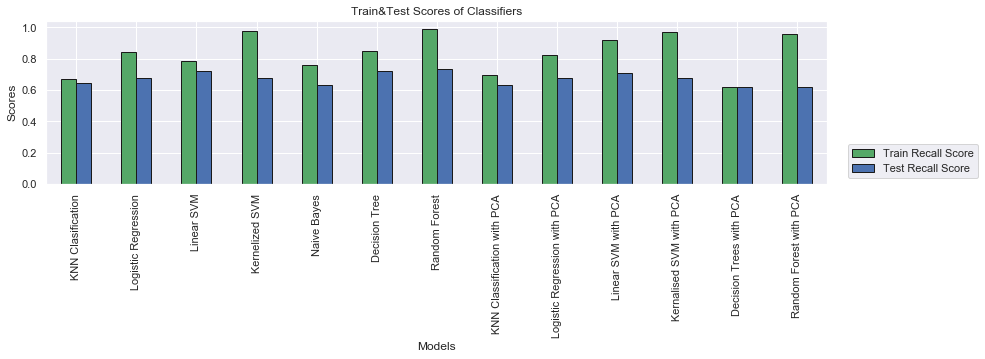

In [169]:
for_plot.plot(kind='bar', figsize=(14,3), color='gbmykc',  edgecolor='k')

plt.title('Train&Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show();

The Results have improved after using PCA. We get the best result using **Linear SVC after applying PCA**

In [ ]:

from sklearn.metrics import accuracy_score, f1_score, log_loss

voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_val)
acc = accuracy_score(y_val, preds)
l_loss = log_loss(y_val, preds)
f1 = f1_score(y_val, preds)

print("Accuracy is: " + str(acc))
print("Log Loss is: " + str(l_loss))
print("F1 Score is: " + str(f1))